# Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# shows plots in jupyter notebook
%matplotlib inline

#set plot style
sns.set(color_codes=True)

# Load data

In [15]:
df = pd.read_csv(r"C:\Users\MY PC\OneDrive\Desktop\DOCUMENTS\Data Analyst\Python\Practice and Learn\PowerCo\data_for_predictions.csv")
df.drop(columns = ["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


# Modelling

In [22]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
# make a copy of our data
train_df = df.copy()

# seperate target variable from independent variables
y = df['churn']
x = df.drop(columns = ['id', 'churn'])
print(x.shape)
print(y.shape)

(14606, 61)
(14606,)


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


# Model Training

In [40]:
#  Add model training in here
model = RandomForestClassifier(n_estimators=1000) #Add parameters to the model!
model.fit(x_train, y_train) #Complete this method call

RandomForestClassifier(n_estimators=1000)

# Evaluation

In [45]:
predictions = model.predict(x_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [47]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [49]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 17
False positives: 4
True negatives: 3282
False negatives: 349
Accuracy: 0.9033406352683461
Precision: 0.8095238095238095
Recall: 0.04644808743169399


# Model understanding

In [54]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending = True).reset_index()

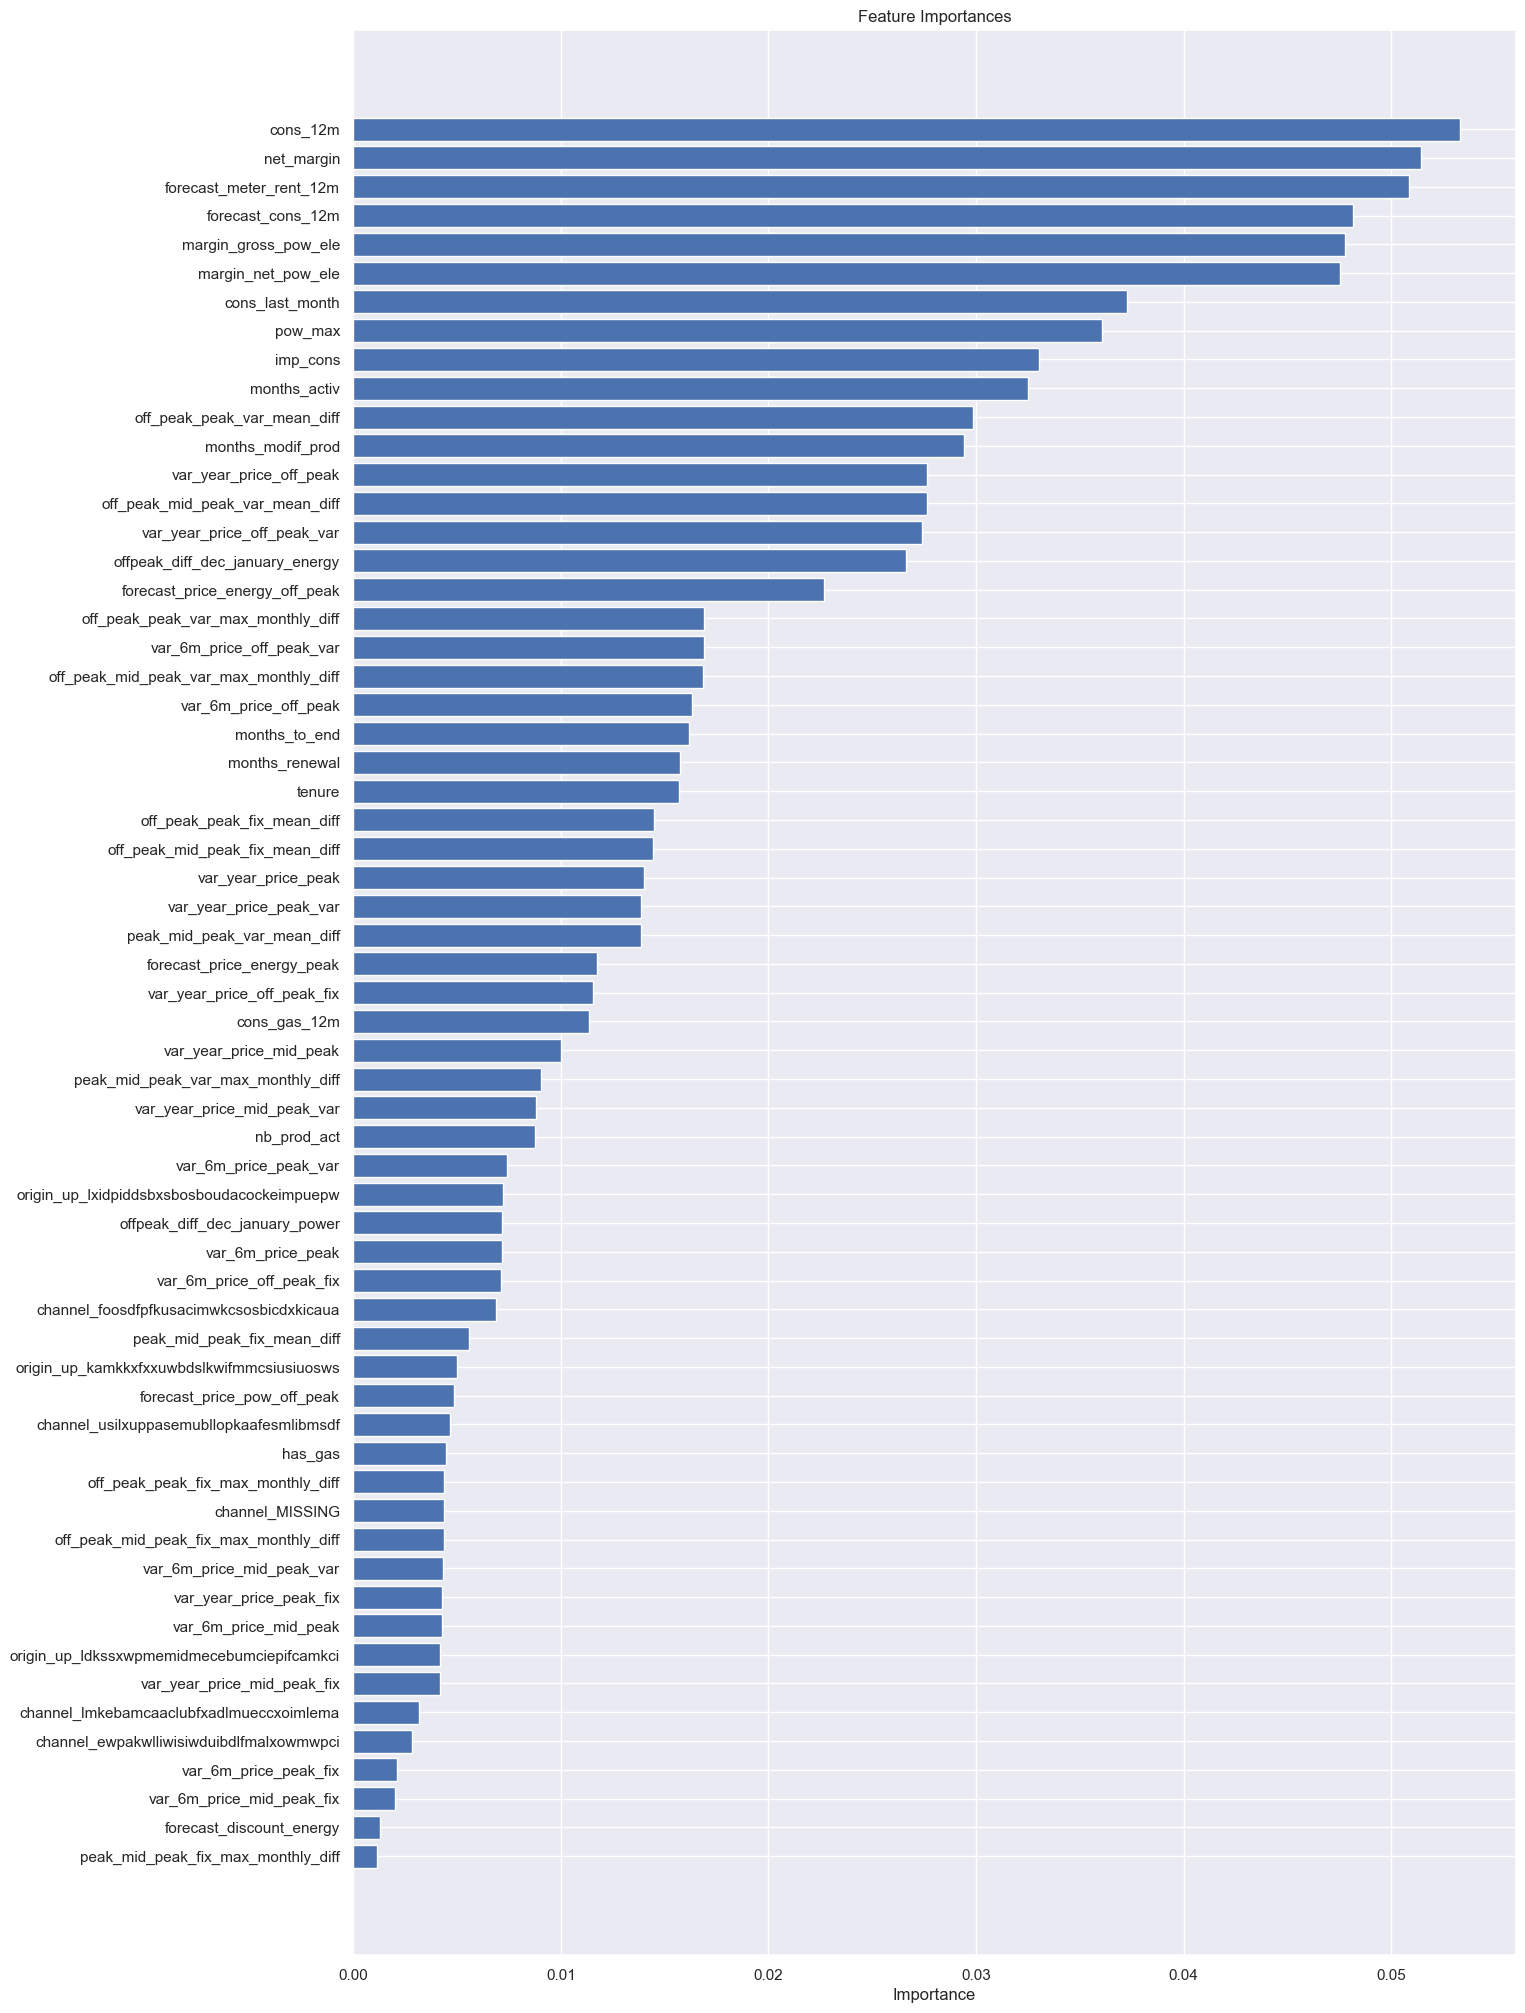

In [56]:
plt.figure(figsize=(15,25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [60]:
proba_predictions = model.predict_proba(x_test)
probabilities = proba_predictions[:,1]

In [66]:
x_test = x_test.reset_index()
x_test.drop(columns='index', inplace=True)

In [68]:
x_test['churn']=predictions.tolist()
x_test['churn_probability']=probabilities.tolist()
x_test.to_csv('out_of_sample_data_with_prediction.csv')

In [70]:
# Read the CSV file
df = pd.read_csv("out_of_sample_data_with_prediction.csv")

# Display the first few rows
print(df.head())

   Unnamed: 0  level_0  cons_12m  cons_gas_12m  cons_last_month  \
0           0        0  4.173390      4.193598         3.165541   
1           1        1  4.075036      0.000000         3.003461   
2           2        2  3.848435      0.000000         0.000000   
3           3        3  4.345433      0.000000         0.000000   
4           4        4  4.185655      0.000000         3.355834   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           3.168368                       0.0                 2.073828   
1           3.305998                      30.0                 1.255031   
2           2.756568                       0.0                 1.289366   
3           3.516690                       0.0                 1.304921   
4           3.208148                       0.0                 2.123067   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                        0.114667                    0.099548  ...   
1     